## やっていること
* スマホ同士のground-truthを比較=> スマホは十分近いので位置は同じとみなして計算してしまう
* 加速度の分析(FFT) スムージング&1秒間隔にデータ作成


In [123]:
using Pkg
Pkg.add("FFTW")
# Pkg.add(url="https://github.com/BBN-Q/Qlab.jl")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [====================>                    ]  48.8 %

  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [7a1cc6ca] + FFTW v1.3.2
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [1]:
include("../src/SavitzkyGolay.jl")

savitzky_golay_filter

In [125]:
using DataFrames
using DataFramesMeta
using CategoricalArrays
using Pipe
using JLD2
using Dates
using LeapSeconds
using Combinatorics
using Random
using Statistics
using Profile
using ProgressMeter
using Format
# using Base.Threads
using CSV
using Glob
using Formatting
using DelimitedFiles
using TextAnalysis
using BenchmarkTools
using GeographicLib
using LinearAlgebra
using LsqFit
using FFTW

ENV["COLUMNS"]=700;
F = Float64
S = Symbol

using PyPlot
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 6
rcParams["figure.figsize"] = [9,9]
rcParams["figure.dpi"] = 220
plt.style.use("seaborn-darkgrid");
include("../src/util_fc.jl")

Main.util_fc

In [110]:
@load "../DataFrames/train_df_concat.jdl2" train_df_concat
@load "../DataFrames/train_gnss_log.jdl2" train_logdf_dict

1-element Array{Symbol,1}:
 :train_logdf_dict

In [111]:
train_accel_df = train_logdf_dict[:UncalAccel]
function skm_m(uncal::F, bias::Union{F,Missing})::F
    if ismissing(bias)
        return uncal
    else
        return uncal - bias
    end
end
train_accel_df[:, :AccelXMps2] = skm_m.(train_accel_df[:, :UncalAccelXMps2] ,train_accel_df[:, :BiasXMps2])
train_accel_df[:, :AccelYMps2] = skm_m.(train_accel_df[:, :UncalAccelYMps2] ,train_accel_df[:, :BiasYMps2])
train_accel_df[:, :AccelZMps2] = skm_m.(train_accel_df[:, :UncalAccelZMps2] ,train_accel_df[:, :BiasZMps2])
train_accel_df

,collectionName,phoneName,phone,time_UTC,UncalAccelXMps2,UncalAccelYMps2,UncalAccelZMps2,BiasXMps2,BiasYMps2,BiasZMps2,utcTimeMillis,elapsedRealtimeNanos,AccelXMps2,AccelYMps2,AccelZMps2
,Cat…?,Cat…?,Cat…?,DateTime,Float64,Float64,Float64,Float64?,Float64?,Float64?,Int64,Int64,Float64,Float64,Float64
1,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.463,-1.00473,5.02743,9.02782,missing,missing,missing,1589494249463,17324899465000,-1.00473,5.02743,9.02782
2,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.465,-1.03362,5.0321,9.06599,missing,missing,missing,1589494249465,17324901875469,-1.03362,5.0321,9.06599
3,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.468,-1.03838,5.00327,9.09474,missing,missing,missing,1589494249468,17324904285886,-1.03838,5.00327,9.09474
4,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.47,-1.05757,4.97917,9.13778,missing,missing,missing,1589494249470,17324906696354,-1.05757,4.97917,9.13778
5,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.473,-1.09111,4.96938,9.16635,missing,missing,missing,1589494249473,17324909106771,-1.09111,4.96938,9.16635
6,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.475,-1.11029,4.95488,9.195,missing,missing,missing,1589494249475,17324911517240,-1.11029,4.95488,9.195
7,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.477,-1.11975,4.9308,9.20456,missing,missing,missing,1589494249477,17324913927709,-1.11975,4.9308,9.20456
8,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.48,-1.11487,4.92122,9.19502,missing,missing,missing,1589494249480,17324916338125,-1.11487,4.92122,9.19502
9,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.482,-1.11479,4.90201,9.19983,missing,missing,missing,1589494249482,17324918748594,-1.11479,4.90201,9.19983


In [112]:
function get_gdf_by_key(gd::GroupedDataFrame, key::Tuple{Any})::Union{DataFrame, Missing}
    if haskey(gd.keymap, key)
        num_gdf = gd.keymap[key]
        return gd[num_gdf]
    else
        return missing
    end
end


get_gdf_by_key (generic function with 1 method)

In [113]:
train_accel_df

,collectionName,phoneName,phone,time_UTC,UncalAccelXMps2,UncalAccelYMps2,UncalAccelZMps2,BiasXMps2,BiasYMps2,BiasZMps2,utcTimeMillis,elapsedRealtimeNanos,AccelXMps2,AccelYMps2,AccelZMps2
,Cat…?,Cat…?,Cat…?,DateTime,Float64,Float64,Float64,Float64?,Float64?,Float64?,Int64,Int64,Float64,Float64,Float64
1,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.463,-1.00473,5.02743,9.02782,missing,missing,missing,1589494249463,17324899465000,-1.00473,5.02743,9.02782
2,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.465,-1.03362,5.0321,9.06599,missing,missing,missing,1589494249465,17324901875469,-1.03362,5.0321,9.06599
3,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.468,-1.03838,5.00327,9.09474,missing,missing,missing,1589494249468,17324904285886,-1.03838,5.00327,9.09474
4,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.47,-1.05757,4.97917,9.13778,missing,missing,missing,1589494249470,17324906696354,-1.05757,4.97917,9.13778
5,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.473,-1.09111,4.96938,9.16635,missing,missing,missing,1589494249473,17324909106771,-1.09111,4.96938,9.16635
6,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.475,-1.11029,4.95488,9.195,missing,missing,missing,1589494249475,17324911517240,-1.11029,4.95488,9.195
7,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.477,-1.11975,4.9308,9.20456,missing,missing,missing,1589494249477,17324913927709,-1.11975,4.9308,9.20456
8,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.48,-1.11487,4.92122,9.19502,missing,missing,missing,1589494249480,17324916338125,-1.11487,4.92122,9.19502
9,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.482,-1.11479,4.90201,9.19983,missing,missing,missing,1589494249482,17324918748594,-1.11479,4.90201,9.19983


In [114]:
function filtered_data(df::DataFrame, d::S, out::S)
    df[!, out] = similar(df[!, d], F)
    gd = groupby(df, :phone)
    for gdf in gd
        y0= gdf[:, d] |> Vector
        y1 = savitzky_golay_filter(y0, 101, 1)
        gdf[:, out] .= y1
    end
end
     
filtered_data(train_accel_df, :AccelXMps2, :filtered_AccelXMps2)
filtered_data(train_accel_df, :AccelYMps2, :filtered_AccelYMps2)
filtered_data(train_accel_df, :AccelZMps2, :filtered_AccelZMps2)


In [115]:
function linear_interpolation(time::DateTime, data_time::Array{DateTime,1}, data::Array{Float64,1})::Union{F, Missing}
    #dataはソートされていることが前提
    n = length(data_time)
    time_p =  time + Dates.Millisecond(1000)
    idx_0s = searchsortedlast(data_time, time)
    idx_1e = searchsortedfirst(data_time, time_p)
    if idx_0s == 0
        return missing  #data_arr[idx1]
    end
    if idx_1e == n+1
        return missing
    end
    total_time::Float64 = (data_time[idx_1e] - data_time[idx_0s]).value |> F
    res::Float64 = 0.0
    for i in idx_0s:idx_1e-1
        Δt::Float64 = (data_time[i+1] - data_time[i]).value |> F
        res += data[i] * (Δt / total_time)
    end
    return res
end

function interpolate(base_df::DataFrame, base_time_UTC::S, data_df::DataFrame, data_time_UTC::S, data::S, data_ip::S)
    base_df[!, data_ip] = similar(base_df[!,base_time_UTC], Union{F,Missing})
    base_gd = groupby(base_df, :phone)
    data_gd = groupby(data_df, :phone)
    for (base_gdf, key) in zip(base_gd, keys(base_gd))
        n = size(base_gdf, 1)
        data_gdf = get_gdf_by_key(data_gd, (key[1],))
        if  ismissing(data_gdf)
            base_gdf[:, data_ip] .= missing
            continue 
        end
        time = base_gdf[:, base_time_UTC]
        data_time = data_gdf[:, data_time_UTC]
        data_ =  data_gdf[:, data]
        res = Vector{Union{F, Missing}}(missing,n)
        
        # no data -> return missing
        length(data_time) == 0 && return res
        # println("hello")
        p = sortperm(data_time)
        sorted_time = data_time[p]
        sorted_data = data_[p]
        for i in 1:n
            res[i] = linear_interpolation(time[i], sorted_time, sorted_data)
        end
        base_gdf[:, data_ip] .= res
    end
end

interpolate (generic function with 1 method)

In [116]:
interpolate(train_df_concat, :time_UTC, train_accel_df, :time_UTC, :filtered_AccelXMps2, :filtered_AccelXMps2)
interpolate(train_df_concat, :time_UTC, train_accel_df, :time_UTC, :filtered_AccelYMps2, :filtered_AccelYMps2)
interpolate(train_df_concat, :time_UTC, train_accel_df, :time_UTC, :filtered_AccelZMps2, :filtered_AccelZMps2)

In [117]:
d = @select(train_df_concat,:phone, :time_UTC, 
    :UncalAccelXMps2,  :filtered_AccelXMps2,
    :UncalAccelYMps2, :filtered_AccelYMps2,
    :UncalAccelZMps2, :filtered_AccelZMps2,)
"""
d = @select(train_df_concat,:phone, :time_UTC, 
    :UncalAccelXMps2, :AccelXMps2, :filtered_AccelXMps2,
    :UncalAccelYMps2, :AccelYMps2, :filtered_AccelYMps2,
    :UncalAccelZMps2, :AccelZMps2, :filtered_AccelZMps2,)
"""

"d = @select(train_df_concat,:phone, :time_UTC, \n    :UncalAccelXMps2, :AccelXMps2, :filtered_AccelXMps2,\n    :UncalAccelYMps2, :AccelYMps2, :filtered_AccelYMps2,\n    :UncalAccelZMps2, :AccelZMps2, :filtered_AccelZMps2,)\n"

In [122]:
X = d.filtered_AccelXMps2
Y = d.filtered_AccelYMps2
Z = d.filtered_AccelZMps2
mean(sqrt.(X.^2+Y.^2+Z.^2) |> skipmissing)

9.854766769096777

In [287]:
function lowpass(df::DataFrame, col::S, cut_off_hz = 5.0)
    col_out = S("$(col)_lowpass")
    df[!, col_out] = similar(df[!, col], F)
    gd = groupby(df, :phone)
    for gdf in gd
        x = gdf[:, col] |> Array
        t = gdf[:, :time_UTC] |> Array
        ts = mean(Dates.value.(t[2:end] - t[1:end-1]) / 1000.0)
        n = length(x)
        fftx = fft(x)
        freq_t = fftfreq(n, 1.0/ts)
        fftx[abs.(freq_t) .> cut_off_hz]  .= complex(0.0, 0.0)
        ifft_cut = ifft(fftx)
        gdf[:, col_out] = real.(ifft_cut)
    end
end
lowpass(accel_df, :UncalAccelXMps2)
lowpass(accel_df, :UncalAccelYMps2)
lowpass(accel_df, :UncalAccelZMps2)

In [288]:
accel_df
function optim_gyro(df::DataFrame, X::S, Y::S, ac_x::S, ac_y::S, ac_z::S)

,collectionName,phoneName,phone,time_UTC,UncalAccelXMps2,UncalAccelYMps2,UncalAccelZMps2,BiasXMps2,BiasYMps2,BiasZMps2,utcTimeMillis,elapsedRealtimeNanos,AccelXMps2,AccelYMps2,AccelZMps2,filtered_AccelXMps2,filtered_AccelYMps2,filtered_AccelZMps2,UncalAccelXMps2_lowpass,UncalAccelYMps2_lowpass,UncalAccelZMps2_lowpass
,Cat…?,Cat…?,Cat…?,DateTime,Float64,Float64,Float64,Float64?,Float64?,Float64?,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.463,-1.00473,5.02743,9.02782,missing,missing,missing,1589494249463,17324899465000,-1.12147,4.88259,9.17492,0.0,0.0,0.0,-1.3352,4.16442,9.00279
2,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.465,-1.03362,5.0321,9.06599,missing,missing,missing,1589494249465,17324901875469,-1.11411,4.88745,9.1608,0.0,0.0,0.0,-1.31324,4.19912,8.99791
3,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.468,-1.03838,5.00327,9.09474,missing,missing,missing,1589494249468,17324904285886,-1.10674,4.89231,9.14668,0.0,0.0,0.0,-1.29148,4.23403,8.99281
4,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.47,-1.05757,4.97917,9.13778,missing,missing,missing,1589494249470,17324906696354,-1.09937,4.89716,9.13256,0.0,0.0,0.0,-1.26994,4.26909,8.98747
5,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.473,-1.09111,4.96938,9.16635,missing,missing,missing,1589494249473,17324909106771,-1.092,4.90202,9.11844,0.0,0.0,0.0,-1.24867,4.30424,8.98191
6,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.475,-1.11029,4.95488,9.195,missing,missing,missing,1589494249475,17324911517240,-1.08464,4.90688,9.10432,0.0,0.0,0.0,-1.2277,4.33943,8.97611
7,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.477,-1.11975,4.9308,9.20456,missing,missing,missing,1589494249477,17324913927709,-1.07727,4.91174,9.0902,0.0,0.0,0.0,-1.20707,4.37459,8.97008
8,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.48,-1.11487,4.92122,9.19502,missing,missing,missing,1589494249480,17324916338125,-1.0699,4.91659,9.07608,0.0,0.0,0.0,-1.1868,4.40967,8.9638
9,2020-05-14-US-MTV-1,Pixel4XLModded,2020-05-14-US-MTV-1_Pixel4XLModded,2020-05-14T22:10:49.482,-1.11479,4.90201,9.19983,missing,missing,missing,1589494249482,17324918748594,-1.06254,4.92145,9.06197,0.0,0.0,0.0,-1.16693,4.4446,8.95727


sum(fftx_cut) = 51106.30498203251 + 1.1641532182693481e-10im
sum(fftx_cut) = 17931.88324435612 + 8.003553375601768e-11im


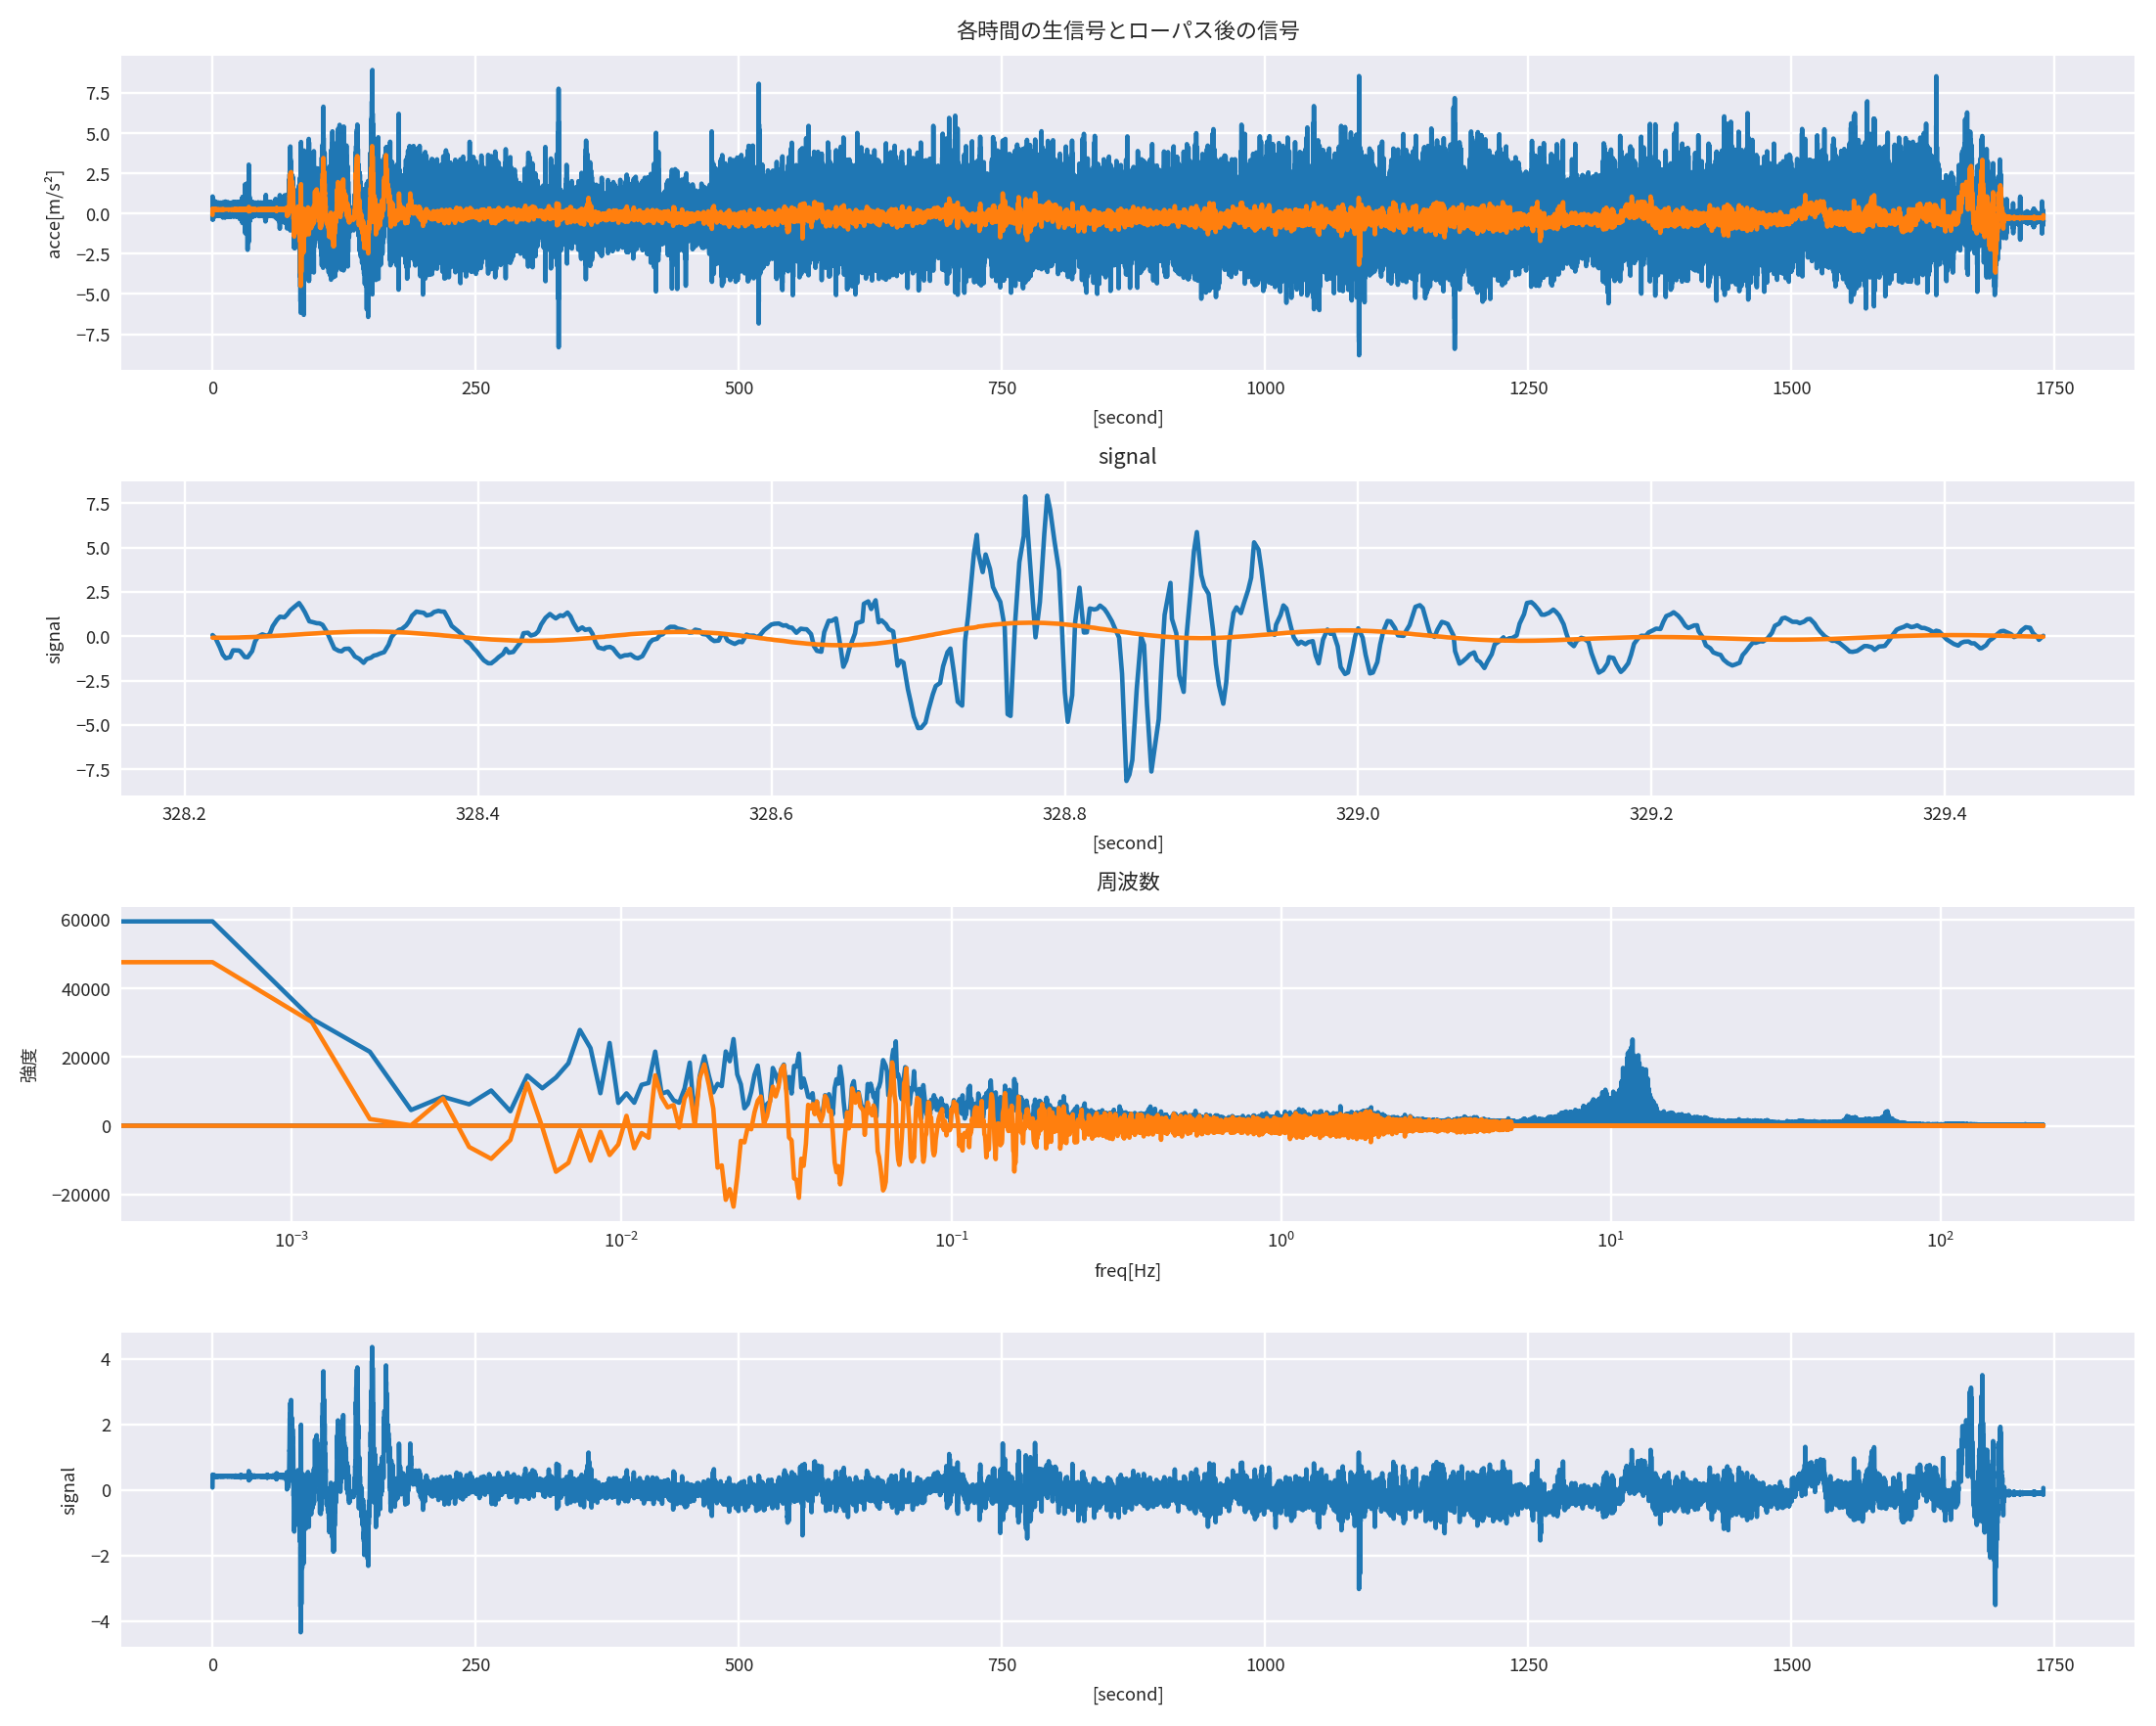

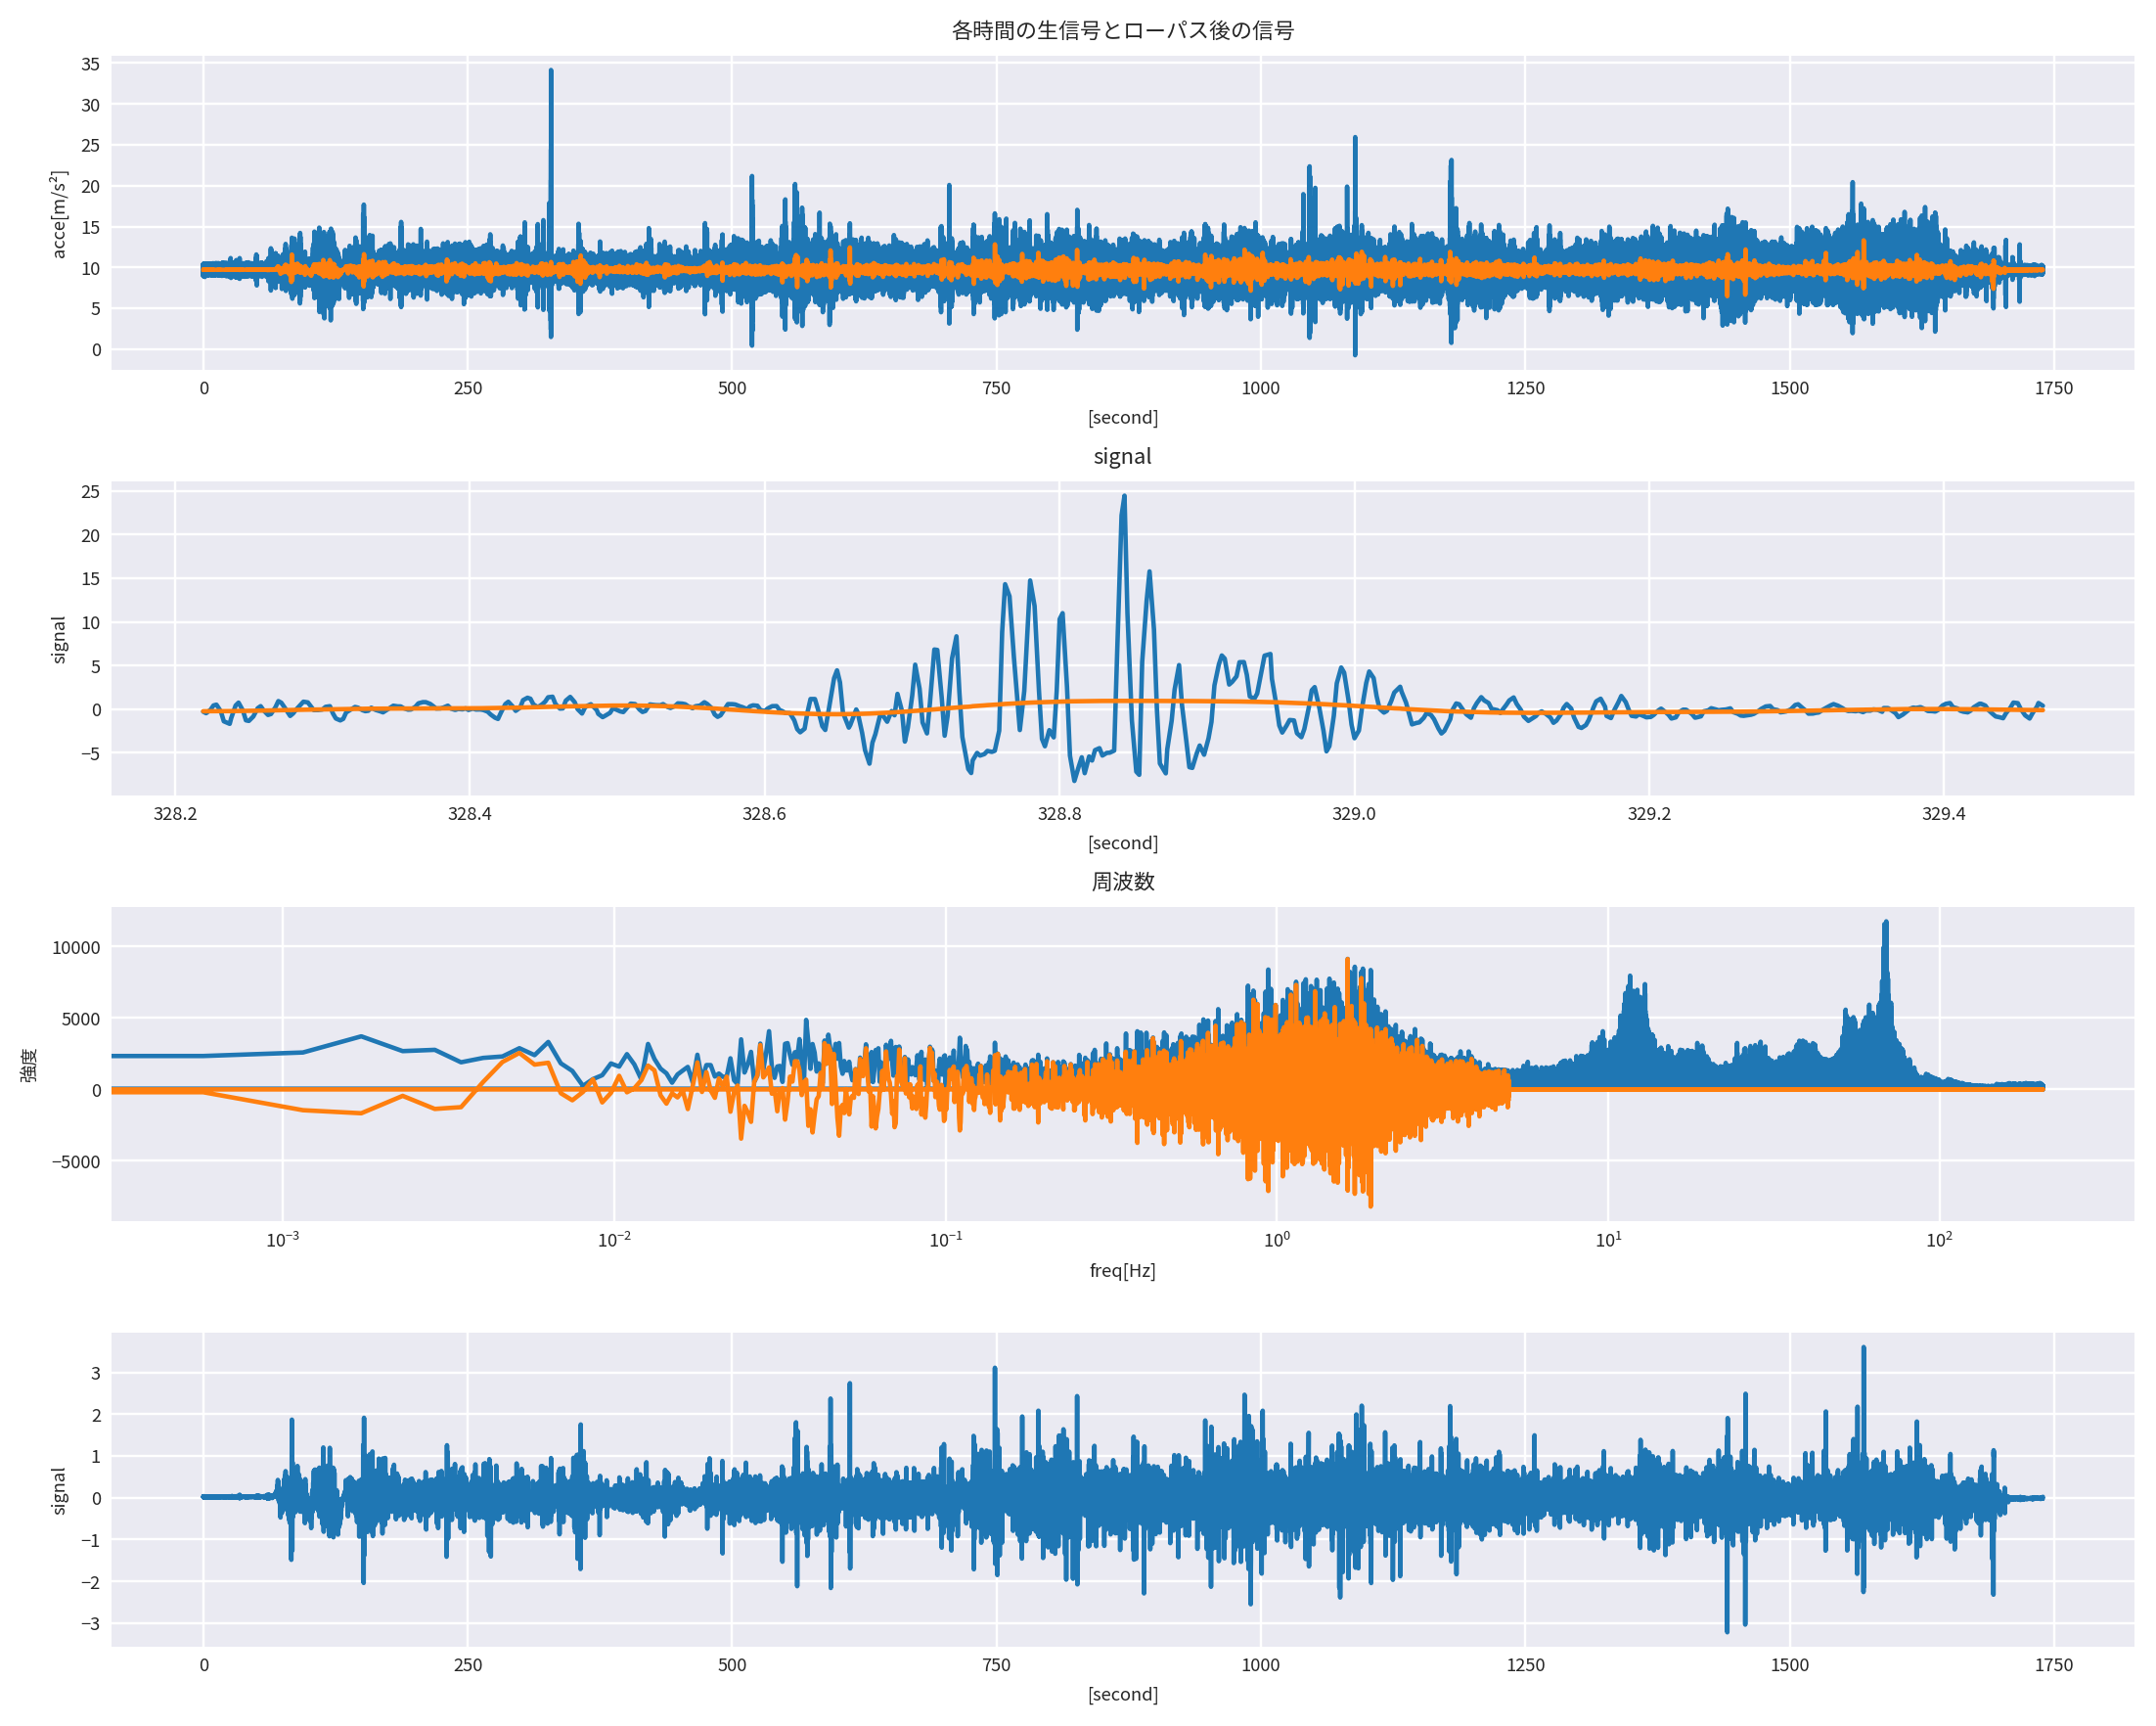

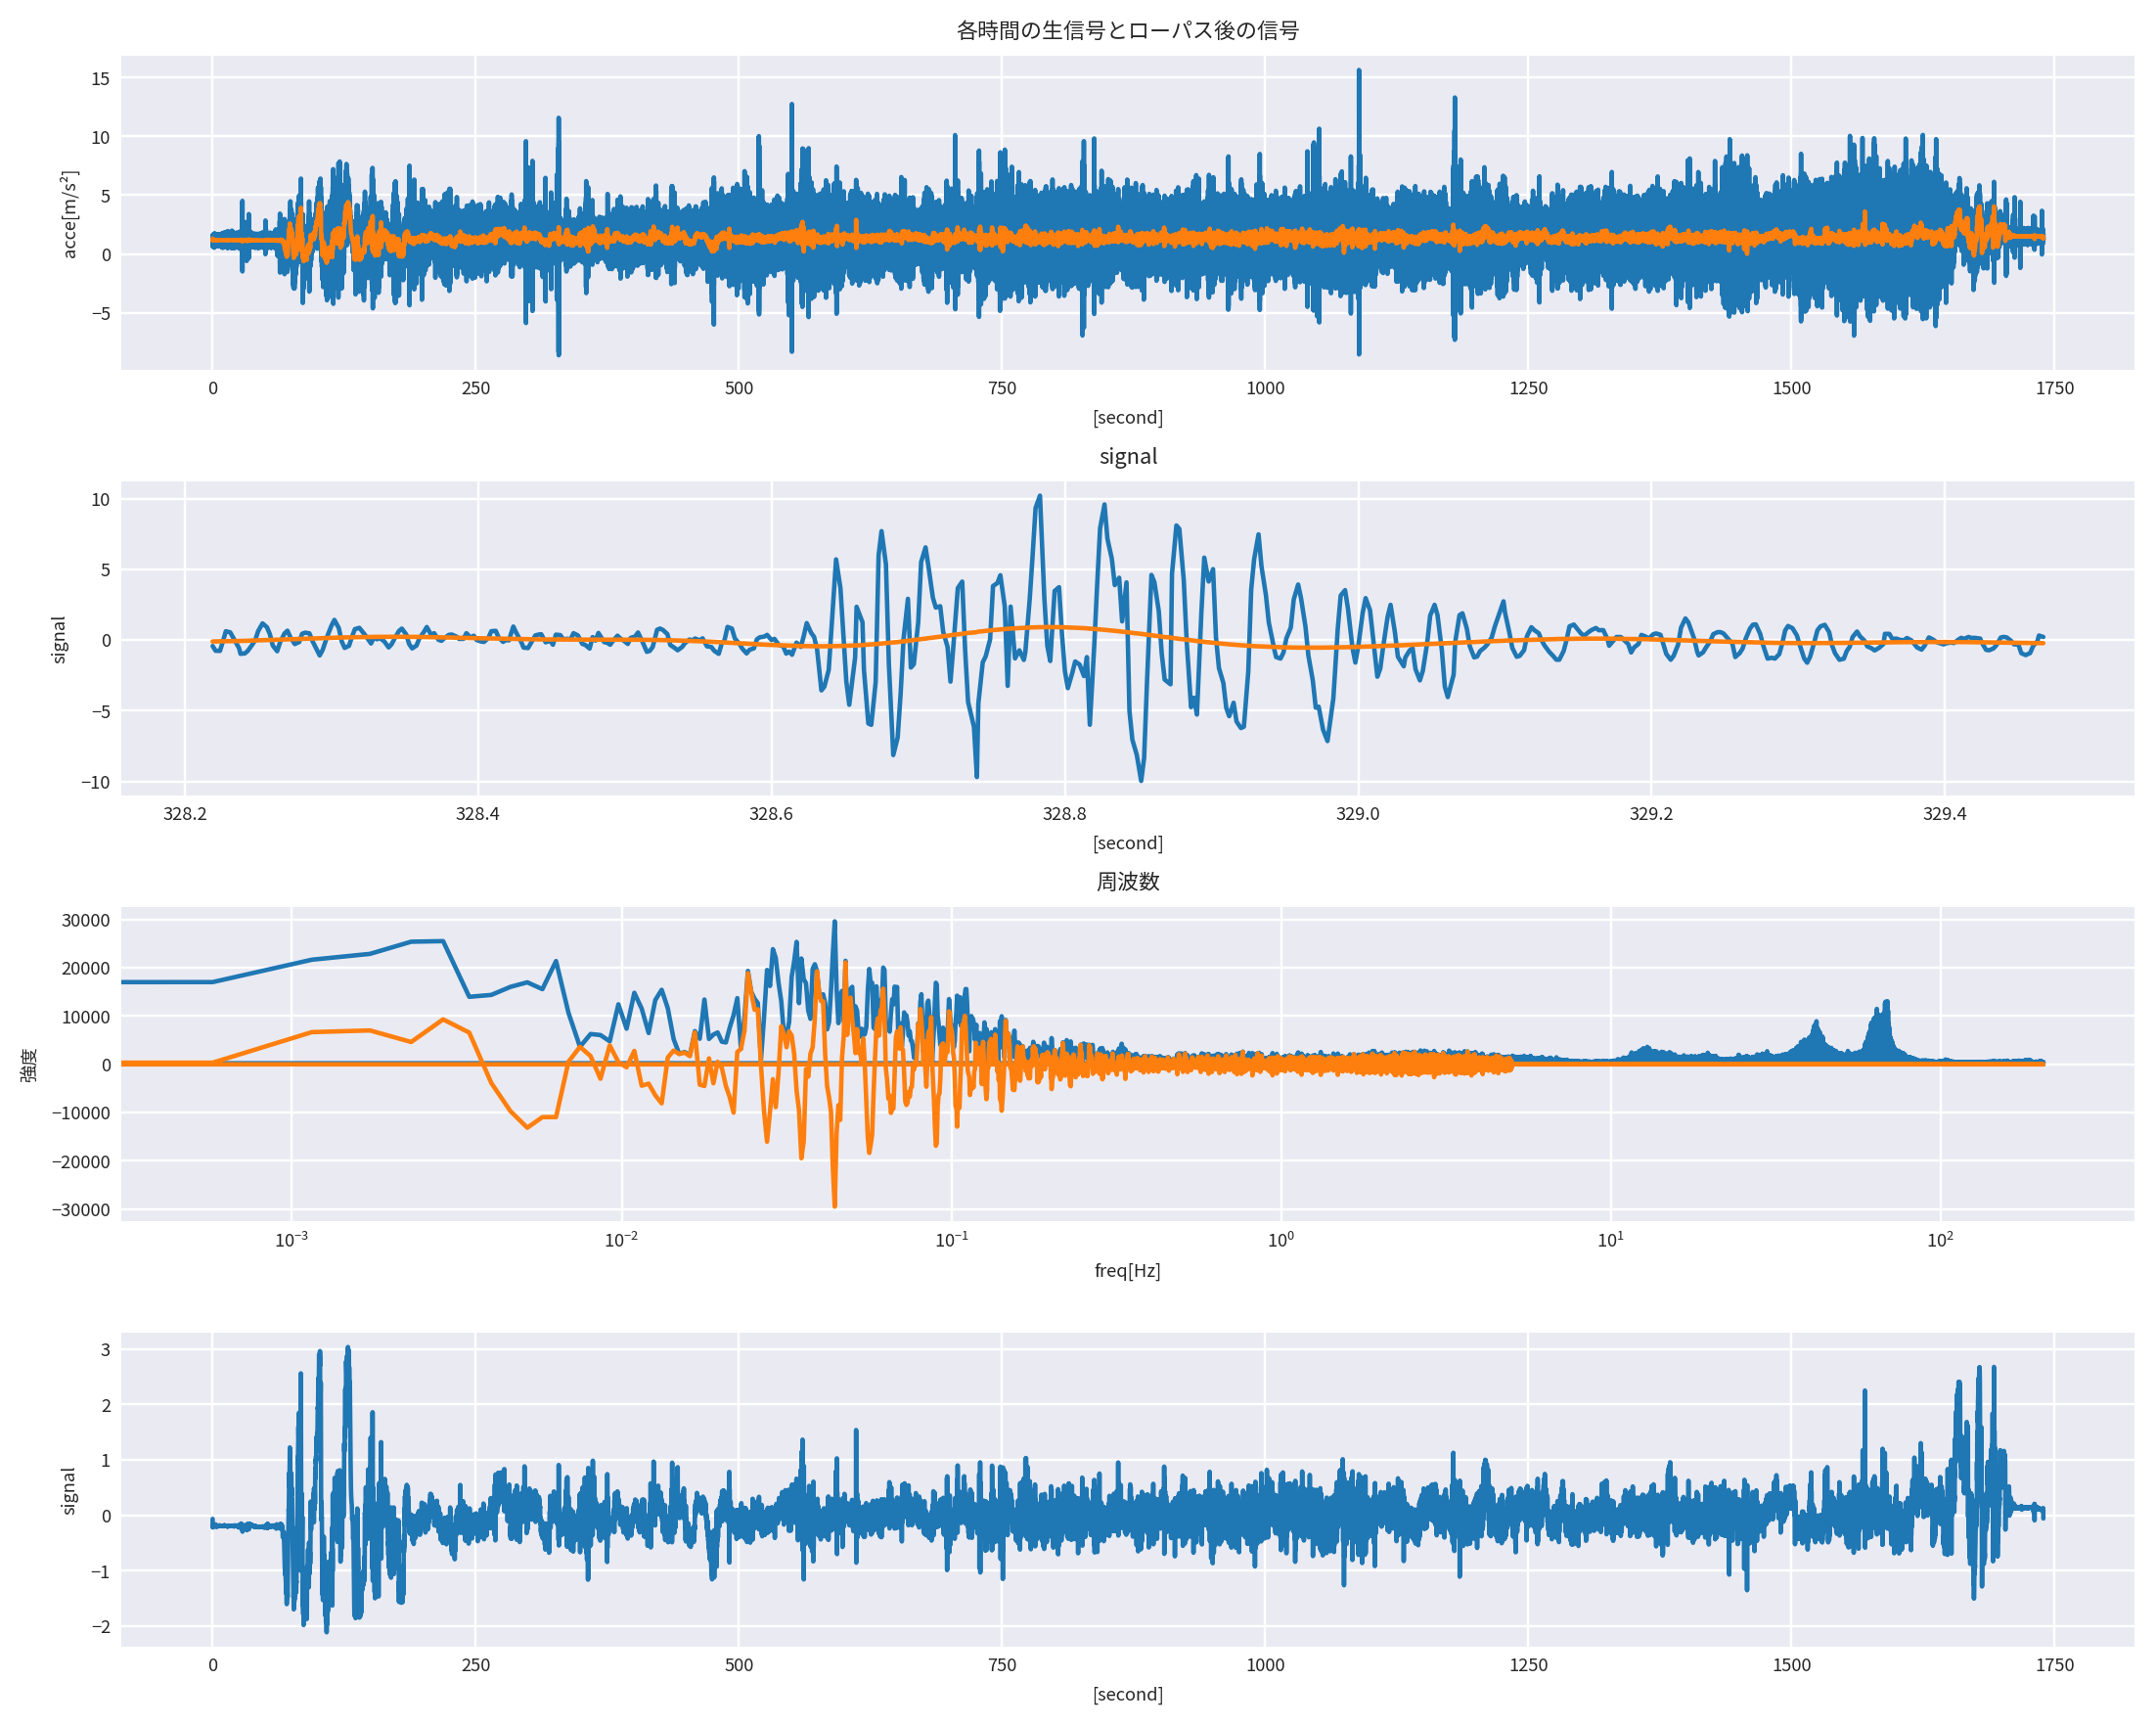

sum(fftx_cut) = -46923.07426071301 - 1.7462298274040222e-10im


In [279]:
function fft_main(t_real::Vector{F}, x0::Vector{F}, cut_off_hz=10.0::F)# ::Vector(F)
    x = x0 .- mean(x0)
    n = length(x)
    s = 134621 - 2^8
    e = s + s + 2^9 -(s+1) # 2^14-1
    ts = mean(t_real[2:end] - t_real[1:end-1])
    t = ts * collect(0:n-1)
    fftx = fft(x)
    rfftx = abs.(fftx)
    freq_t = fftfreq(n, 1.0/ts)
    rfreq_t = real.(freq_t)
    t_ =  1 ./ rfreq_t
    
    fftx_cut = deepcopy(fftx)
    fftx_cut[abs.(freq_t) .> cut_off_hz] .= complex(0.0, 0.0)
    @show(sum(fftx_cut))
    ifft_cut = ifft(fftx_cut) # * 2.0
    
    fig, ax = plt.subplots(4, 1, figsize=(10,8))
    ax[1].plot(t_real, x .+ mean(x0))
    ax[1].plot(t_real, ifft_cut .+ mean(x0))
    ax[1].set_xlabel("[second]")
    ax[1].set_ylabel("acce[m/s²]")
    ax[1].set_title("各時間の生信号とローパス後の信号")
    
    ax[2].plot(t_real[s:e], x[s:e])
    ax[2].plot(t_real[s:e], ifft_cut[s:e])
    ax[2].set_xlabel("[second]")
    ax[2].set_ylabel("signal")
    ax[2].set_title("signal")
    
    ax[3].plot(rfreq_t, rfftx)
    ax[3].plot(rfreq_t, real.(fftx_cut))
    ax[3].set_xlabel("freq[Hz]")
    ax[3].set_ylabel("強度")
    ax[3].set_title("周波数")
    ax[3].set_xscale("log")
    fig.tight_layout()
    
    # ifftx = ifft(fftx)
    err =  x - ifft_cut
    ax[4].plot(t_real, ifft_cut)
    max_err = maximum(abs.(err))
    ax[4].set_xlabel("[second]")
    ax[4].set_ylabel("signal")
    fig.tight_layout()
end

ac_gd = groupby(accel_df, :phone)
ac_gdf = ac_gd[1]
n = length(ac_gdf.time_UTC)
s = 1
e = s + n -1 #  -1  2^18 -1
x0 =  ac_gdf.time_UTC[s]
x = ac_gdf.time_UTC[s:e]
t = Dates.value.(x .- x0) / 1000 #seconds
y0= ac_gdf.UncalAccelXMps2 |> Array
y1= ac_gdf.UncalAccelYMps2 |> Array
y2= ac_gdf.UncalAccelZMps2 |> Array

fft_main(t, y0, 5.0)
fft_main(t, y1, 5.0)
fft_main(t, y2, 5.0)

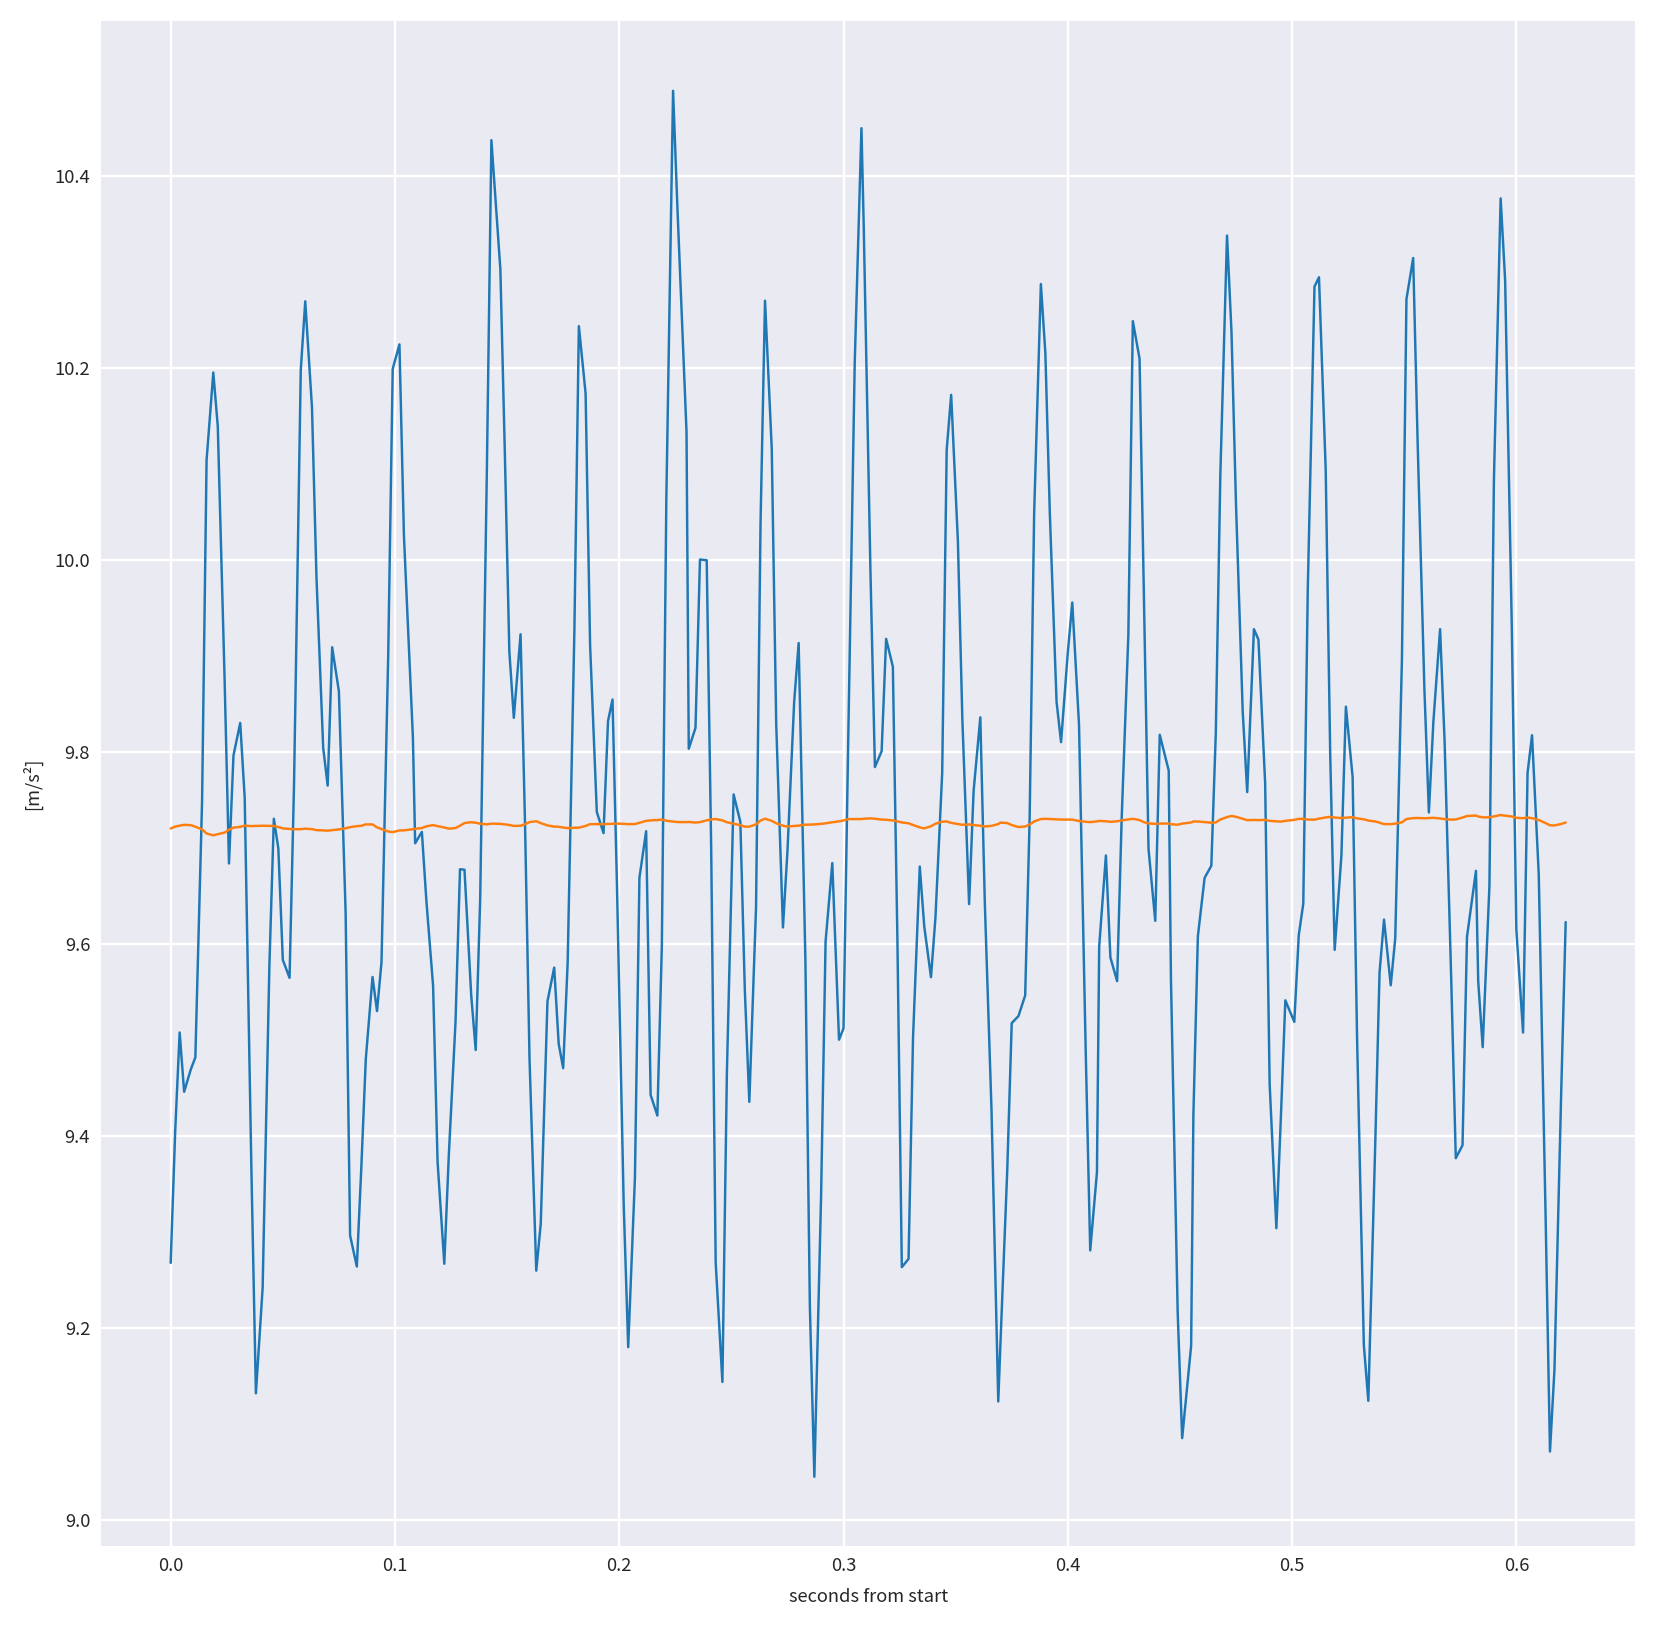

PyObject Text(42.26562500000002, 0.5, '[m/s²]')

In [159]:
ac_gd = groupby(accel_df, :phone)
s = 1_000
e = s + 2^8 -1
x0 =  ac_gd[1].time_UTC[s]
x = ac_gd[1].time_UTC[s:e]
t = Dates.value.(x .- x0) / 1000 #seconds
y0= ac_gd[1].UncalAccelYMps2
y1 = savitzky_golay_filter(y0, 101, 1)[s:e]
y0 = y0[s:e]

n = length(y0)
fig, ax = plt.subplots()
ax.plot(t, y0, lw=0.8)
ax.plot(t, y1, lw=0.8)
ax.set_xlabel("seconds from start")
ax.set_ylabel("[m/s²]")

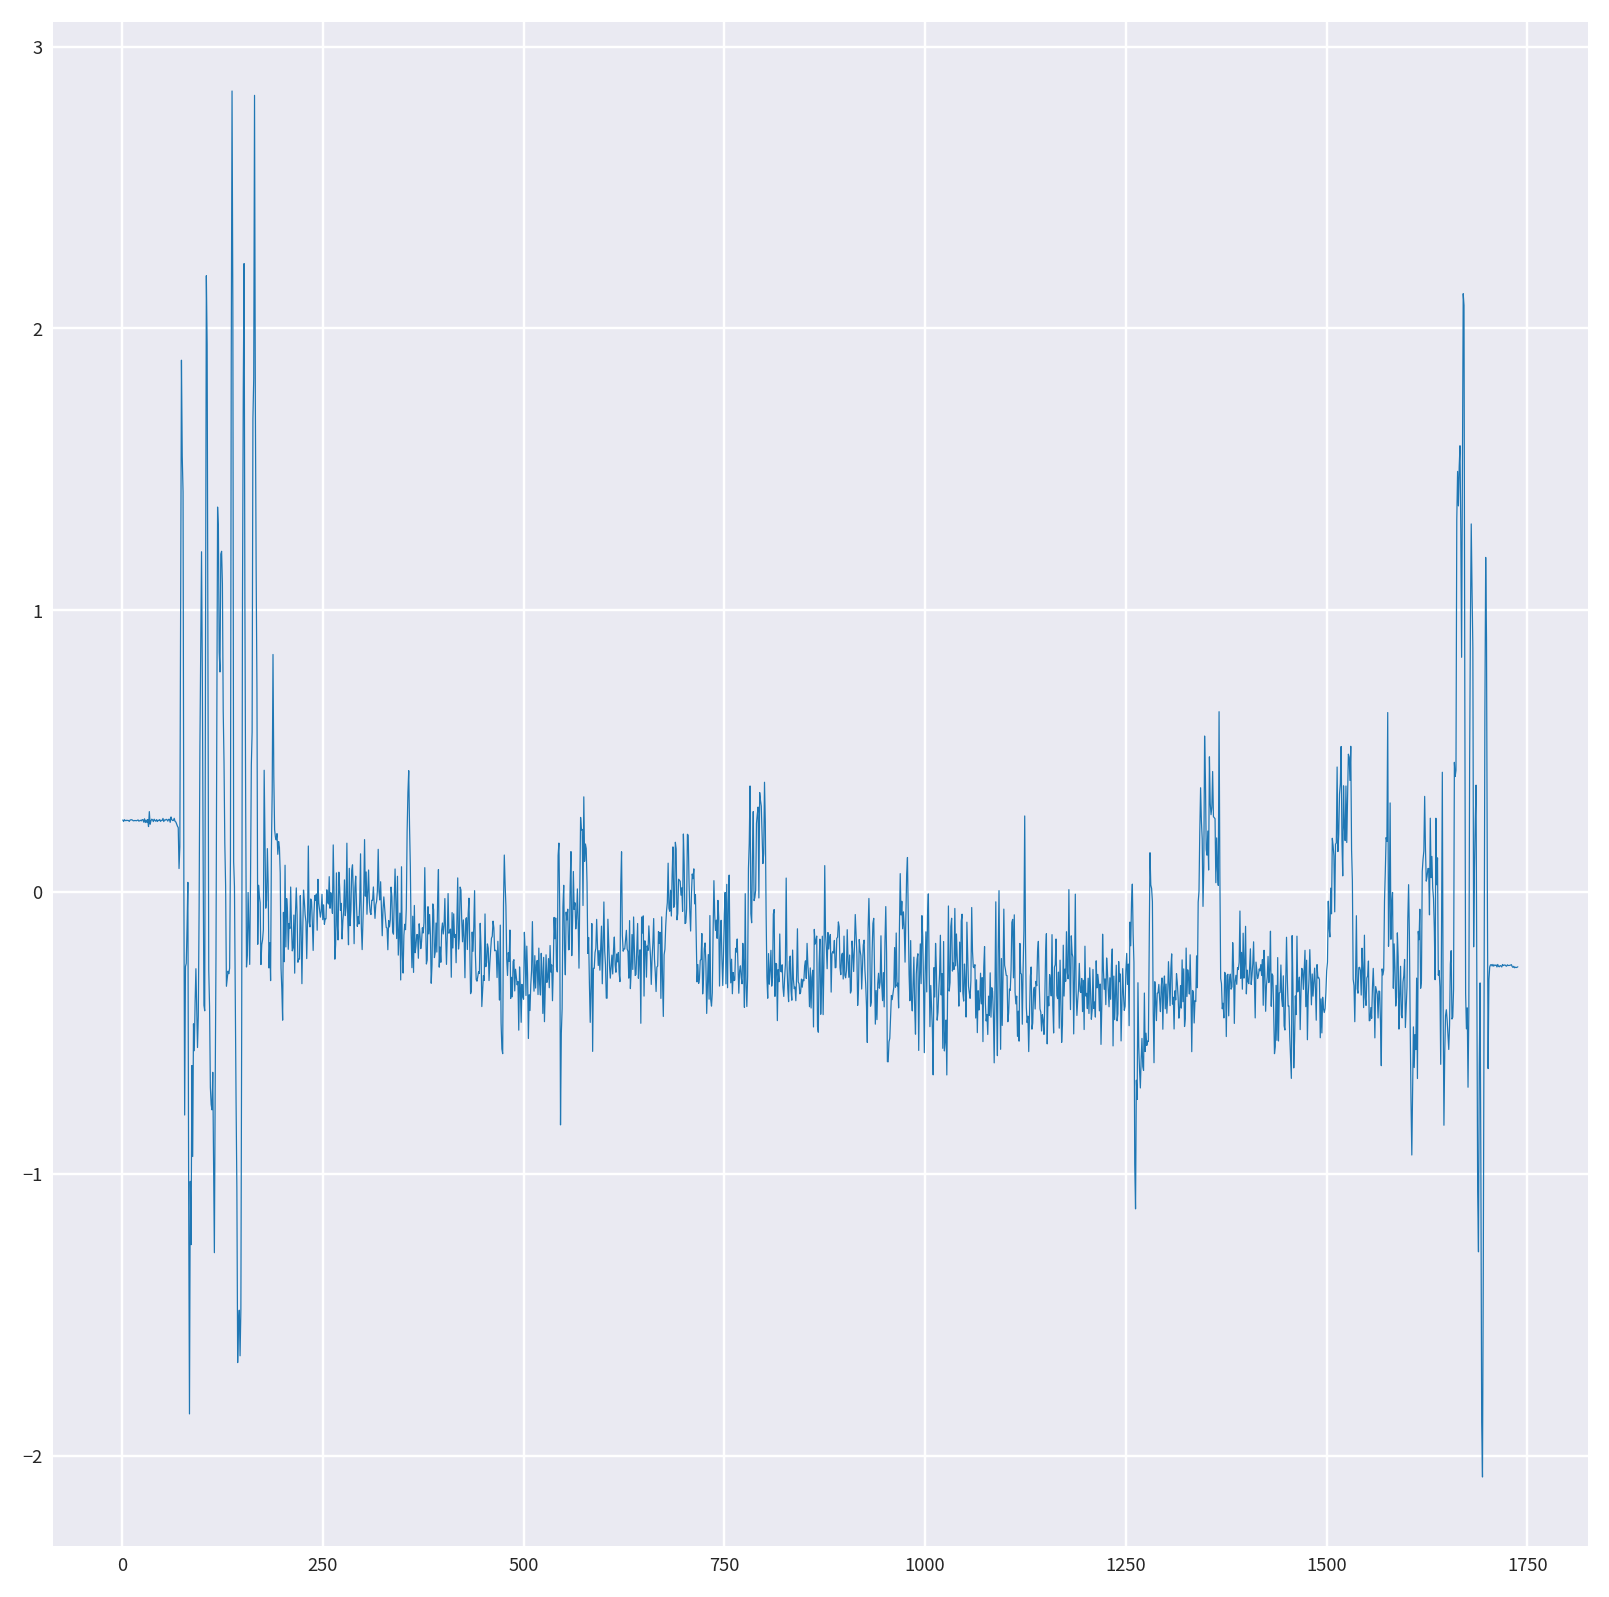

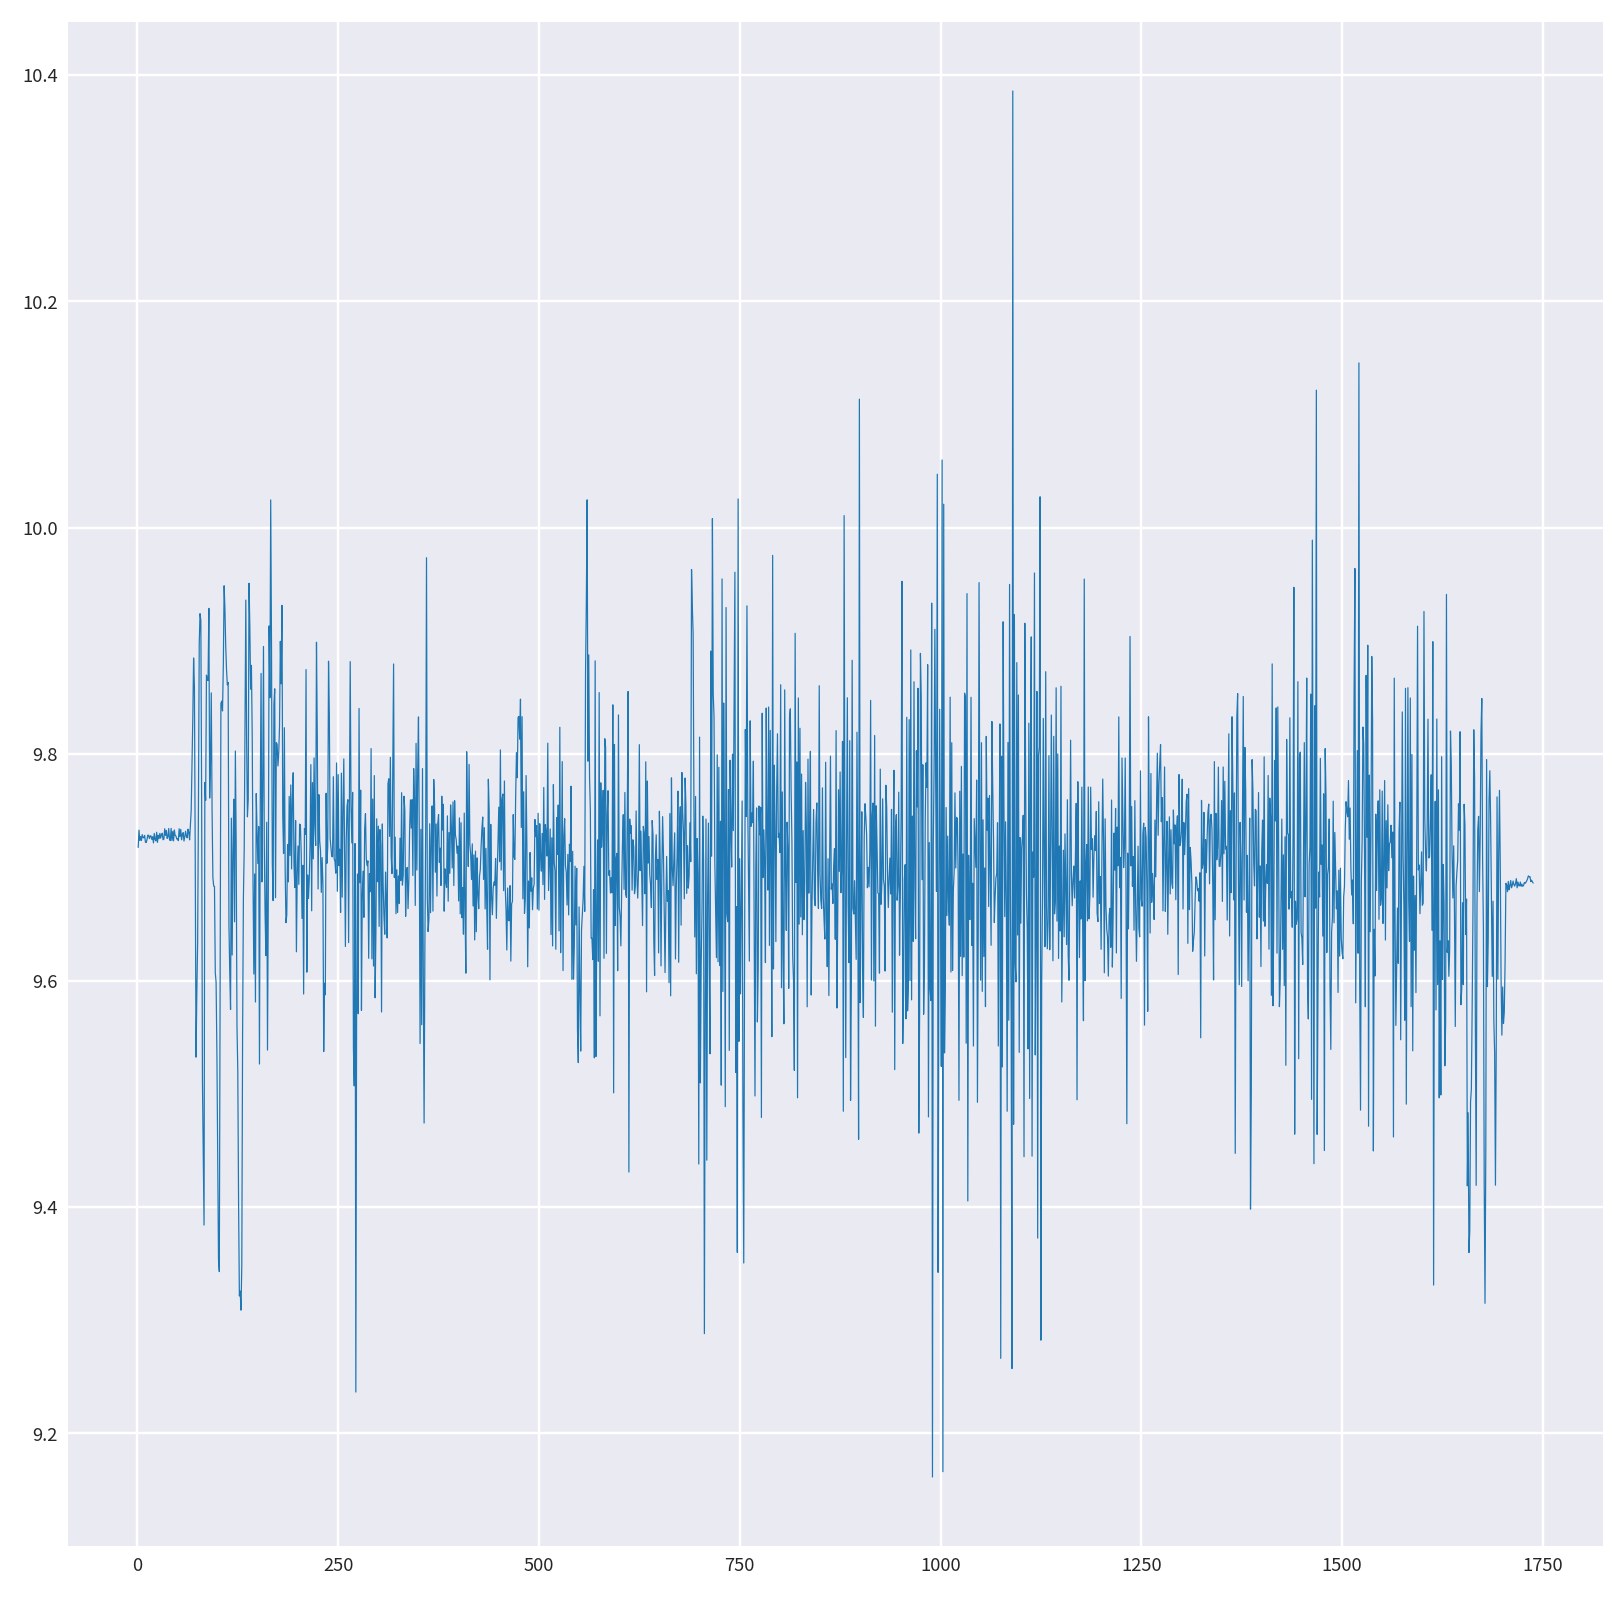

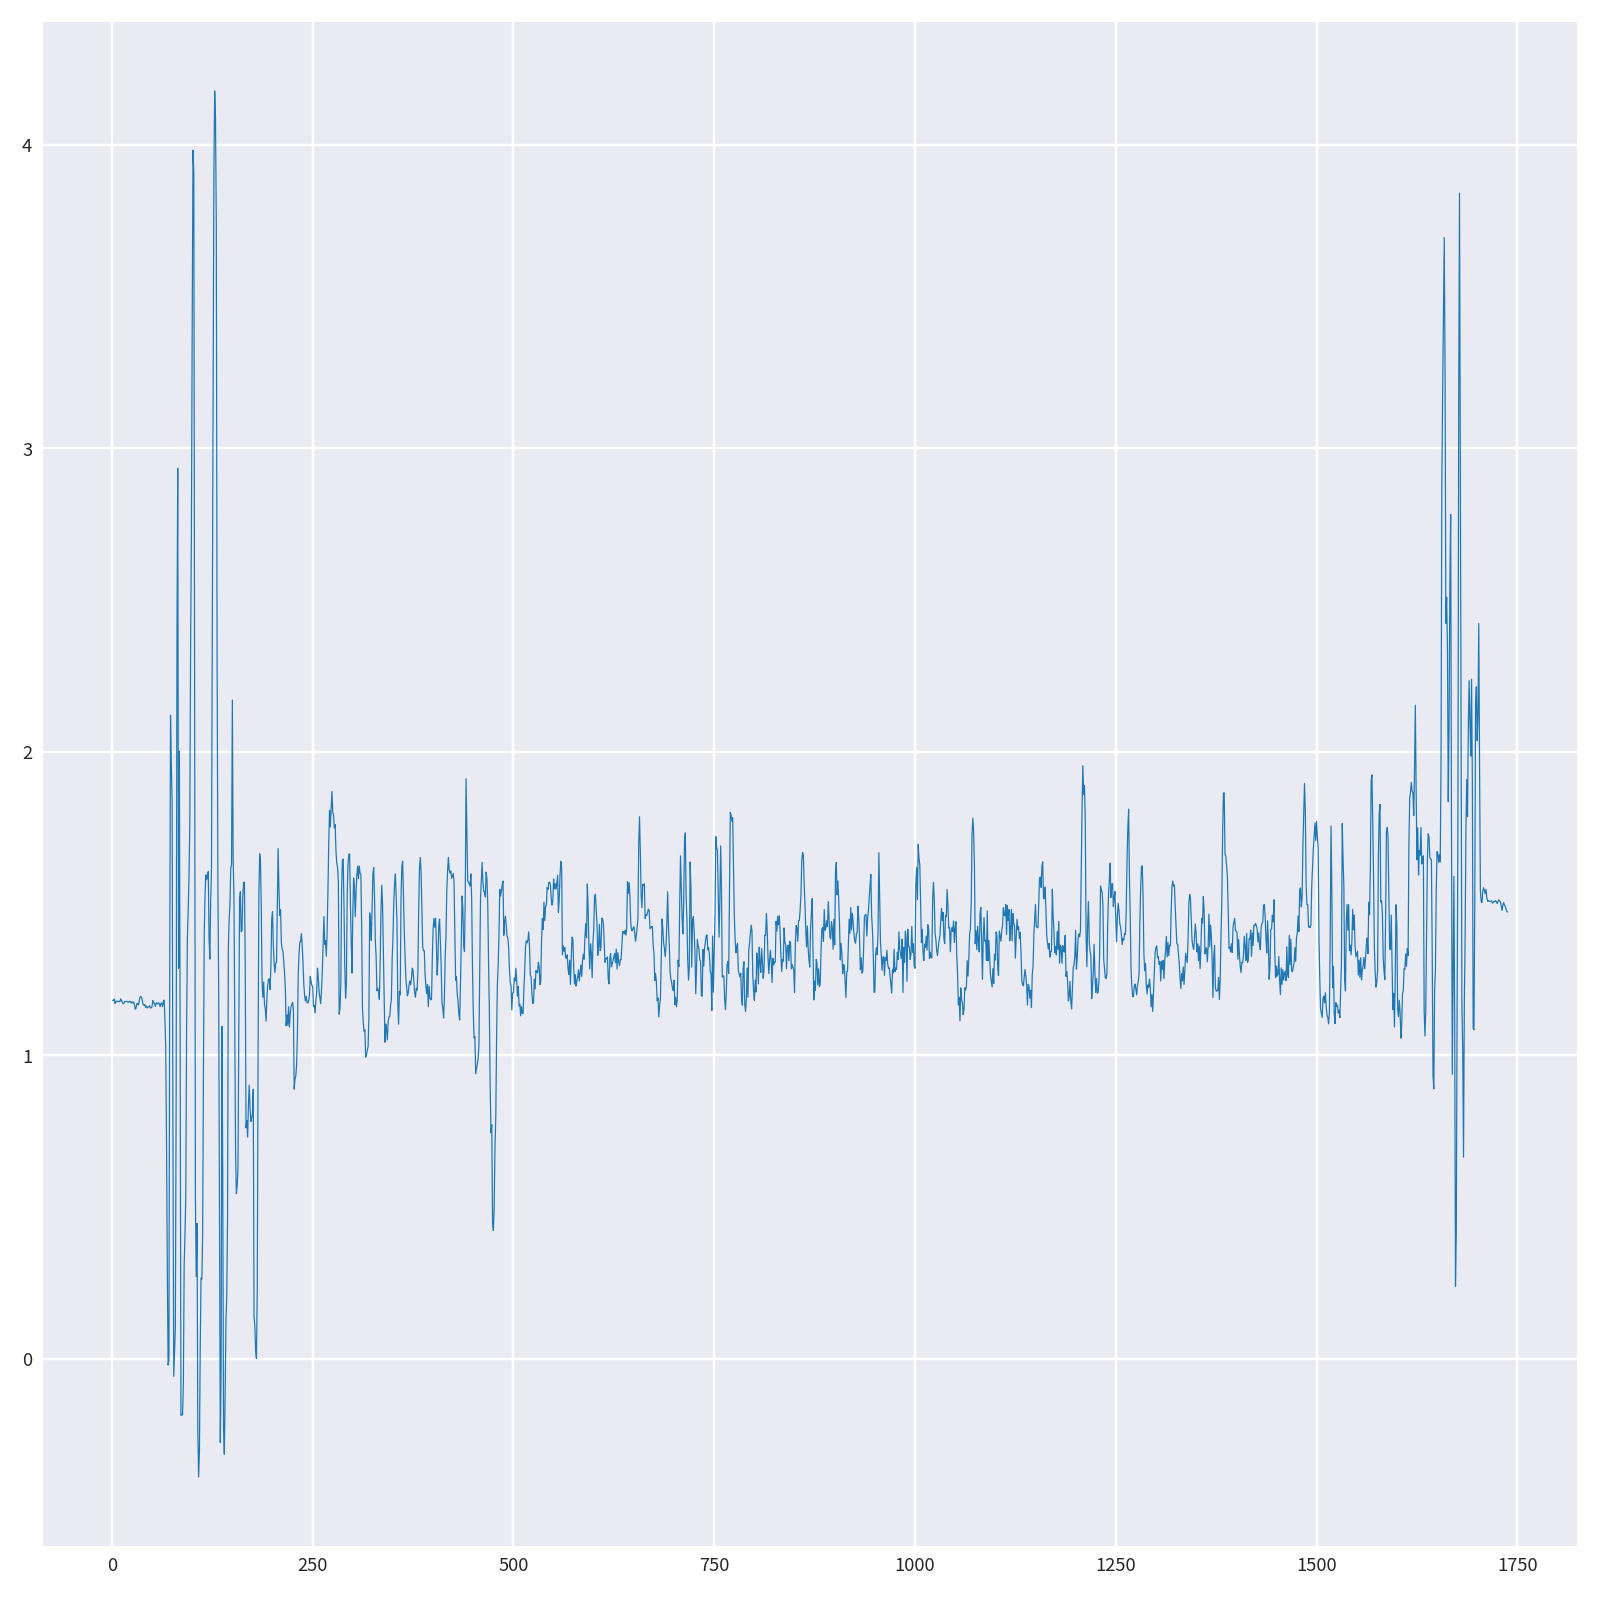

#= In[79]:6 =# @combine(gd, x = mean(skipmissing(:AccelXMps2)), y = mean(skipmissing(:AccelYMps2)), z = mean(skipmissing(:AccelZMps2))) = 73×4 DataFrame
 Row │ phone                              x             y           z
     │ String                             Float64       Float64     Float64
─────┼─────────────────────────────────────────────────────────────────────────
   1 │ 2020-05-14-US-MTV-1_Pixel4          -0.159531      9.70195     1.36983
   2 │ 2020-05-14-US-MTV-1_Pixel4XLModd…   -1.25747      -0.60541    -9.24732
   3 │ 2020-05-14-US-MTV-2_Pixel4          -0.134801      9.72642     1.26686
   4 │ 2020-05-14-US-MTV-2_Pixel4XLModd…   -1.63406      -0.459722   -9.09485
   5 │ 2020-05-21-US-MTV-1_Pixel4          -0.177051      9.787       0.833423
   6 │ 2020-05-21-US-MTV-2_Pixel4          -0.26249       9.77178     0.849513
   7 │ 2020-05-21-US-MTV-2_Pixel4XL        -0.172979      9.74442     1.15117
   8 │ 2020-05-29-US-MTV-1_Pixel4           0.123228      9.71627     1.3

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff3b342c518>

In [79]:
d = @select(train_df_concat,:phone, :time_UTC, 
    :UncalAccelXMps2, :AccelXMps2, 
    :UncalAccelYMps2, :AccelYMps2,
    :UncalAccelZMps2, :AccelZMps2,)
gd = groupby(d, :phone)
@show(@combine(gd, x=mean(skipmissing(:AccelXMps2)),y=mean(skipmissing(:AccelYMps2)),z=mean(skipmissing(:AccelZMps2))))

gd = groupby(d, :phone)
fig, ax =plt.subplots()
y = skipmissing(gd[1].AccelXMps2) |> collect
n = size(y,1)
ax.plot(1:n, y, lw=0.4)
fig, ax =plt.subplots()
y = skipmissing(gd[1].AccelYMps2) |> collect
n = size(y,1)
ax.plot(1:n, y, lw=0.4)
fig, ax =plt.subplots()
y = skipmissing(gd[1].AccelZMps2) |> collect
n = size(y,1)
ax.plot(1:n, y, lw=0.4)
# skipmissing(d.AccelXMps2) |> collect


In [127]:
function lnglat2XY(df::DataFrame, lng::S, lat::S, X::S, Y::S)
    ## 中心点は測定されたlng,latとする，ground truth は中心に使用しない
    df[!, X] = similar(df[!,lng],F)
    df[!, Y] = similar(df[!,lat],F)
    df[!, :lngDeg_centre] = similar(df[!,lng],F)
    df[!, :latDeg_centre] = similar(df[!,lat],F)
    gd1= groupby(df, :collectionName)
    for gdf1 in gd1
        lng_centre = mean(gdf1[:,:lngDeg]) #! あくまで中心点はlngDegの中心，groundtruthでも同じ
        lat_centre = mean(gdf1[:,:latDeg]) #! あくまで中心点はlngDegの中心，groundtruthでも同じ
        gd = groupby(gdf1, :phone)
        for gdf in gd
            for (i, (lat_, lng_)) in enumerate(zip(gdf[!,lat], gdf[!,lng]))
                res = inverse(lng_centre, lat_centre, lng_, lat_)
                dist, θ = res[:dist], deg2rad(res[:azi])
                gdf[i, X], gdf[i, Y] = dist*sin(θ), dist*cos(θ) 
                gdf[i, :lngDeg_centre], gdf[i, :latDeg_centre] = lng_centre, lat_centre
            end
        end
    end
end
lnglat2XY(train_df_concat, :gt_lngDeg, :gt_latDeg, :X_gt, :Y_gt)

In [69]:
function calc_pos_by_vel(df::DataFrame)
    d = @select(df, :collectionName, :phone, :time_UTC,:X_gt, :Y_gt, :gt_courseDegree)
    gd1 = groupby(d, :collectionName)
    res_df = DataFrame()
    for gdf1 in gd1
        gd2 = groupby(gdf1, :phone)
        n =  length(gd2)
        n == 1 && continue
        base_df = DataFrame(gd2[1])
        # base_df[:, :X_gt2] = similar(base_df[:, :X_gt], F)
        for i = 2:n
            dfi = gd2[i]
            base_df[:, S("X_gt$i")] = interpolate(Array(base_df.time_UTC), Array(dfi[:,:time_UTC]), Array(dfi[:,:X_gt]))
            base_df[:, S("Y_gt$i")] = interpolate(Array(base_df.time_UTC), Array(dfi[:,:time_UTC]), Array(dfi[:,:Y_gt]))
            base_df[:, S("X_diff$i")] =  base_df[:, :X_gt]  - base_df[:, S("X_gt$i")] 
            base_df[:, S("Y_diff$i")] =  base_df[:, :Y_gt]  - base_df[:, S("Y_gt$i")] 
            d = sqrt.(base_df[:, S("X_diff$i")].^2 + base_df[:, S("Y_diff$i")].^2)
            base_df[:, S("V_diff$i")] = d .* cos.(deg2rad.(base_df[:,:gt_courseDegree]))
            base_df[:, S("U_diff$i")] = d .* sin.(deg2rad.(base_df[:,:gt_courseDegree]))
            
        end
        append!(res_df, base_df, cols=:union)
    end
    return res_df
end
diff_df = calc_pos_by_vel(train_df_concat)
gd = groupby(diff_df, :collectionName)
"""
fig, ax = plt.subplots()
n = size(diff_df, 1)
ax.plot(1:n, 100 * diff_df.V_diff2)
ax.plot(1:n, 100 * diff_df.U_diff2)
ax.set_xlabel("count")
ax.set_ylabel("diff[cm]")
"""
function median_(a)
    try
        median(a)
    catch
        return NaN
        end
end
        
score = @combine(gd, 
    V2=100*median_(skipmissing(:V_diff2)), U2=100*median_(skipmissing(:U_diff2)),
    V3=100*median_(skipmissing(:V_diff3)), U3=100*median_(skipmissing(:U_diff3)),
    V4=100*median_(skipmissing(:V_diff4)), U4=100*median_(skipmissing(:U_diff4)))


,collectionName,V2,U2,V3,U3,V4,U4
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-05-14-US-MTV-1,13.8396,-11.9013,NaN,NaN,NaN,NaN
2,2020-05-14-US-MTV-2,-3.81956e5,3.17926e5,NaN,NaN,NaN,NaN
3,2020-05-21-US-MTV-2,-6.51242,7.30599,NaN,NaN,NaN,NaN
4,2020-05-29-US-MTV-1,5.46255,-6.25013,3.38064,-3.84711,NaN,NaN
5,2020-05-29-US-MTV-2,-4.73662,5.75398,NaN,NaN,NaN,NaN
6,2020-06-04-US-MTV-1,6.04733,-7.421,4.22987,-5.22263,NaN,NaN
7,2020-06-05-US-MTV-1,6.20785,-5.91148,0.412658,-0.316836,NaN,NaN
8,2020-06-05-US-MTV-2,-7.40072,6.87606,NaN,NaN,NaN,NaN
9,2020-06-11-US-MTV-1,4.98195,-6.21175,NaN,NaN,NaN,NaN
